# USED CAR PRICE PREDICTION

The following analysis uses data on used car sales in India to gain insights into the factors that affect the selling price of a car and the aim is to be able to predict the price that a used car will sell for.

Dataset obtained from Nehal Birla via Kaggle:
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

#### Importing and inspecting data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('used_cars.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df[df.isnull().any(axis=1)].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

#### Dropping rows with null values

Instances with null values largely have missing data across all of the last last five columns. As it would be inaccurate to impute all of these missing values and null entries make up only a small percentage of the dataset, these instances will be dropped.

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


#### Separating the manufacturer from the model in the car name

In [7]:
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])
df['model'] = df['name'].apply(lambda x: x.split(' ', maxsplit=1)[1])

# Placing manufacturer and model columns at the front, selling_price at the end and removing name column
df = df[['manufacturer', 'model'] + [col for col in df if col not in ['manufacturer', 'model', 'selling_price']] + ['selling_price']]
df.drop(columns=['name'], inplace=True)

df.head()

,manufacturer,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda,City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai,i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti,Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000


#### Converting year to age

The car purchase year will be subtracted from 2020 (year when the data was scraped) to get the age, which will be a more meaningful number for data visualisation.

In [8]:
df['age'] = 2020 - df['year']

# Placing age column in index 2 and removing year column
df = df[['manufacturer', 'model', 'age'] + [col for col in df if col not in ['manufacturer', 'model', 'age', 'selling_price']] + ['selling_price']]
df.drop(columns=['year'], inplace=True)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000


#### Mileage units
The mileage column contains values with mostly kmpl (kilometres per litre) as units but the cars with CNG and LPG fuel types have mileage listed with units km/kg. However, attempting to convert values from km/kg to km/l (by multiplying by the fuel density in kg/m3 to get km/m3 then dividing by 1000 to get km/l) results in extremely unrealistic values.

It is possible that km/l figures were mistakenly reported as km/kg for CNG and LPG fuel types. This is the assumption taken in this study due to the similarity in the km/l and km/kg values.

Some of the instances have a mileage of '0.0 kmpl' which will be treated as null and dropped from the dataset.



In [9]:
filter = (df['mileage'] == '0.0 kmpl')
df.drop(index=df[filter].index, inplace=True)

#### Removing units from the mileage, engine and max_power columns

In [10]:
df['mileage'] = df['mileage'].apply(lambda x: x.split(' ')[0])
df['engine'] = df['engine'].apply(lambda x: x.split(' ')[0])
df['max_power'] = df['max_power'].apply(lambda x: x.split(' ')[0])

# Converting dtypes from object to float
df[['mileage', 'engine', 'max_power', 'seats']] = df[['mileage', 'engine', 'max_power', 'seats']].astype(float)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000


#### Dropping torque column
As the brake horsepower has already been calculated in the max_power column, the torque column can be dropped since break horsepower is calculated as follows:

BHP = Torque x RPM / 5252

BHP is a more meaningful feature as the torque is measured at different rpms for different cars.

In [11]:
df.drop(columns=['torque'], inplace=True)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


#### Test Drive Car

As there are only a small number of cars which were test drive cars, these will be classified as First Owner since they are relatively new.

In [12]:
df['owner'].value_counts()

First Owner             5205
Second Owner            2012
Third Owner              508
Fourth & Above Owner     159
Test Drive Car             5
Name: owner, dtype: int64

In [13]:
owner_filter = (df['owner'] == 'Test Drive Car')
df.loc[owner_filter, 'age']

4383    1
4950    1
4951    1
4952    1
6220    1
Name: age, dtype: int64

In [14]:
df['owner'].replace({'Test Drive Car': 'First Owner'}, inplace=True)
df['owner'].value_counts()

First Owner             5210
Second Owner            2012
Third Owner              508
Fourth & Above Owner     159
Name: owner, dtype: int64

# EXPLORATORY DATA ANALYSIS

The following section aims to use data visualization to identify trends and observe how the different features affect the selling price of the used car.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### How is selling price affected by car age and distance driven?

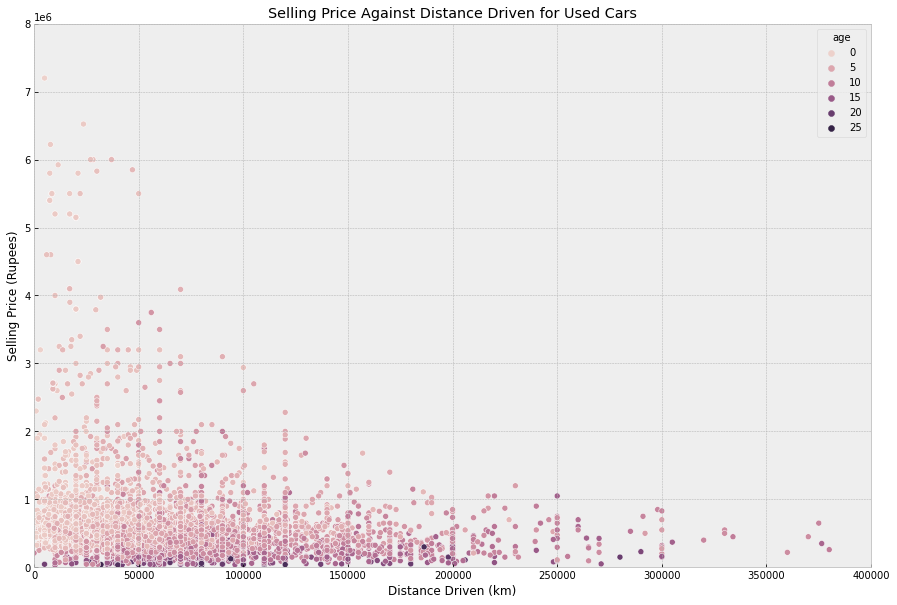

In [16]:
plt.style.use('bmh')
plt.figure(figsize=(15, 10))
sns.scatterplot(x='km_driven', y='selling_price', hue='age', data=df)
plt.ylim(0, 8000000)
plt.xlim(0, 400000)
plt.title('Selling Price Against Distance Driven for Used Cars')
plt.xlabel('Distance Driven (km)')
plt.ylabel('Selling Price (Rupees)')
plt.show()

As expected, older cars and cars that have been driven for longer distances have sold for less.

#### How is selling price affected by car performance?

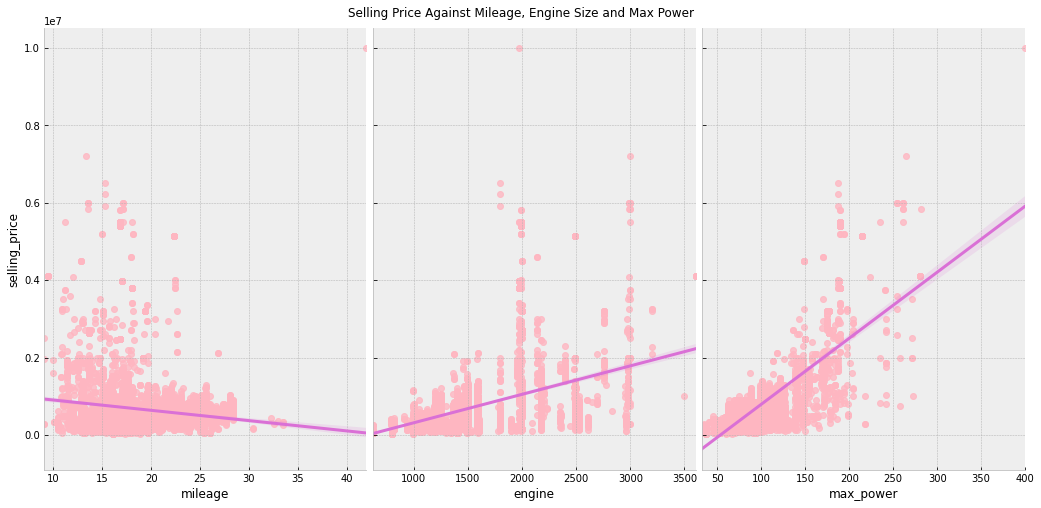

In [17]:
g = sns.pairplot(df,
             x_vars=['mileage','engine','max_power'],
             y_vars='selling_price',
             height=7,
             aspect=0.7,
             kind='reg',
             plot_kws={'line_kws': {'color': 'orchid'}, 'scatter_kws': {'color': 'lightpink'}})
g.fig.suptitle('Selling Price Against Mileage, Engine Size and Max Power', y=1)
plt.show()

It is expected that more powerful cars (greater engine capacity and break horsepower) will sell for higher amounts, and that is evident in the plots for selling price against engine and max power.

However, car mileage (distance driven per litre of fuel) seems have a slight negative correlation with selling price which is surprising.

#### Are Automatic cars worth more than Manual cars?

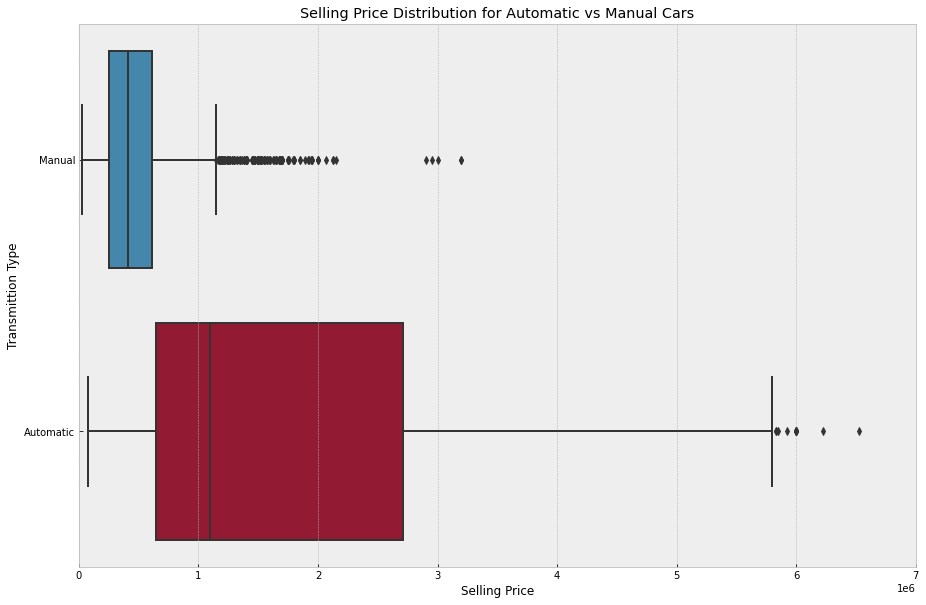

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='selling_price', y='transmission', data=df)
plt.xlim(0, 7000000)
plt.title('Selling Price Distribution for Automatic vs Manual Cars')
plt.xlabel('Selling Price')
plt.ylabel('Transmittion Type')
plt.show()

#### How does the seller type affect selling price?

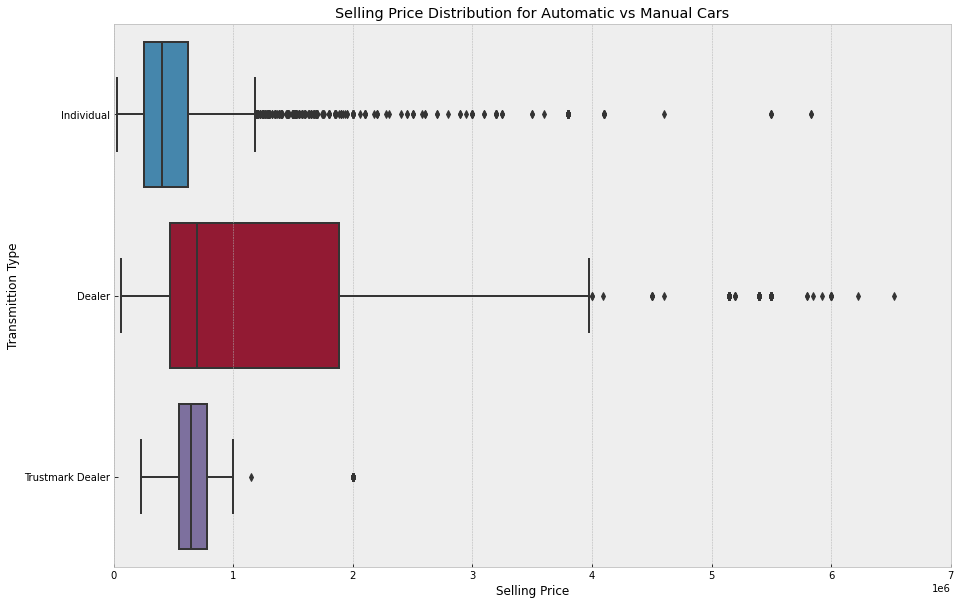

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='selling_price', y='seller_type', data=df)
plt.xlim(0, 7000000)
plt.title('Selling Price Distribution for Automatic vs Manual Cars')
plt.xlabel('Selling Price')
plt.ylabel('Transmittion Type')
plt.show()

It seems that dealers have sold cars for higher prices compared to individuals. This could be due to dealers having professional sales people or knowing the market better than individuals do.

#### What is the relationship between the age of the car and the number of owners?

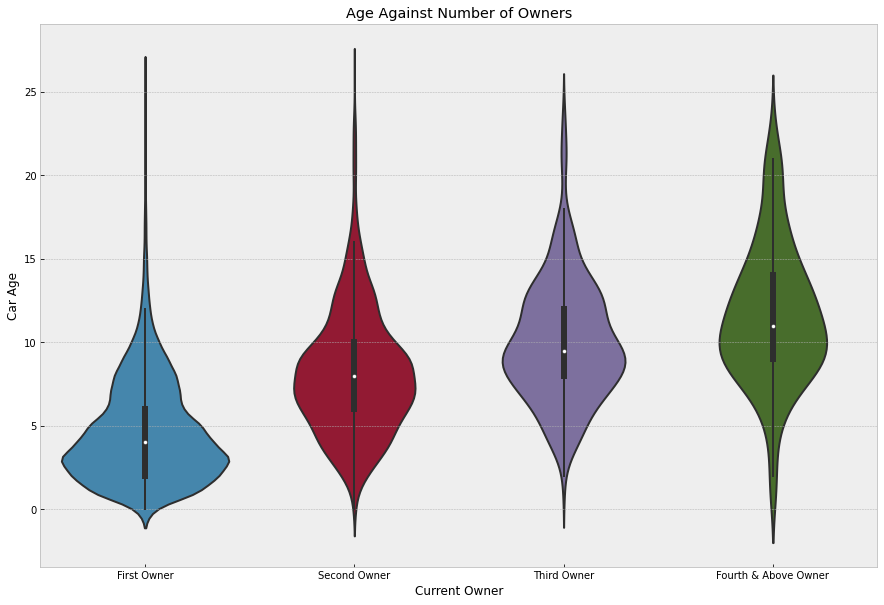

In [20]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='owner', y='age', jitter=0.3, data=df)
plt.title('Age Against Number of Owners')
plt.xlabel('Current Owner')
plt.ylabel('Car Age')
plt.show()

As expected, older cars tend to have more owners.

As expected, automatic cars sell for more than manual cars.

#### How many cars have been sold from each age category?

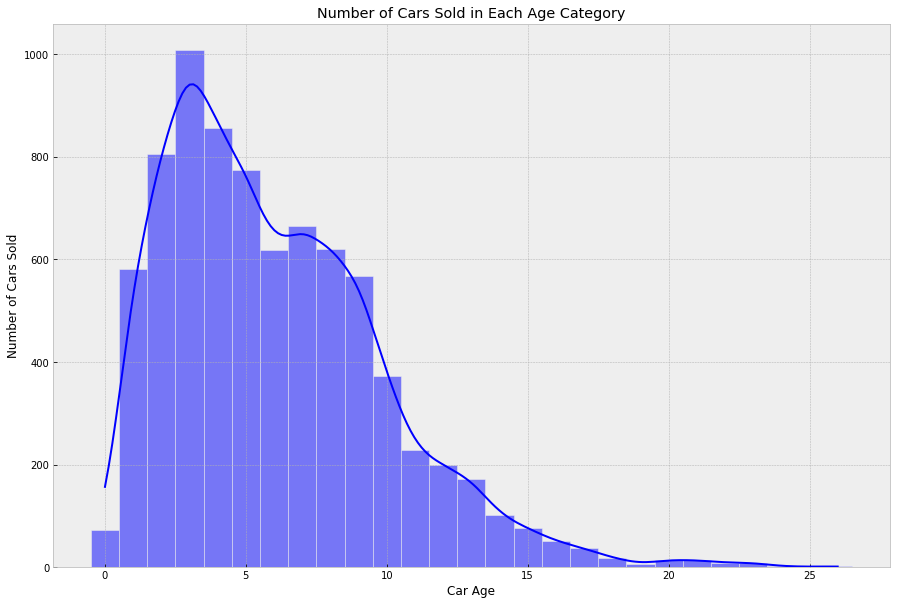

In [21]:
plt.figure(figsize=(15, 10))
sns.histplot(df, x='age', discrete=True, kde=True)
plt.title('Number of Cars Sold in Each Age Category')
plt.xlabel('Car Age')
plt.ylabel('Number of Cars Sold')
plt.show()

#### Which are the most popular car manufacturers?

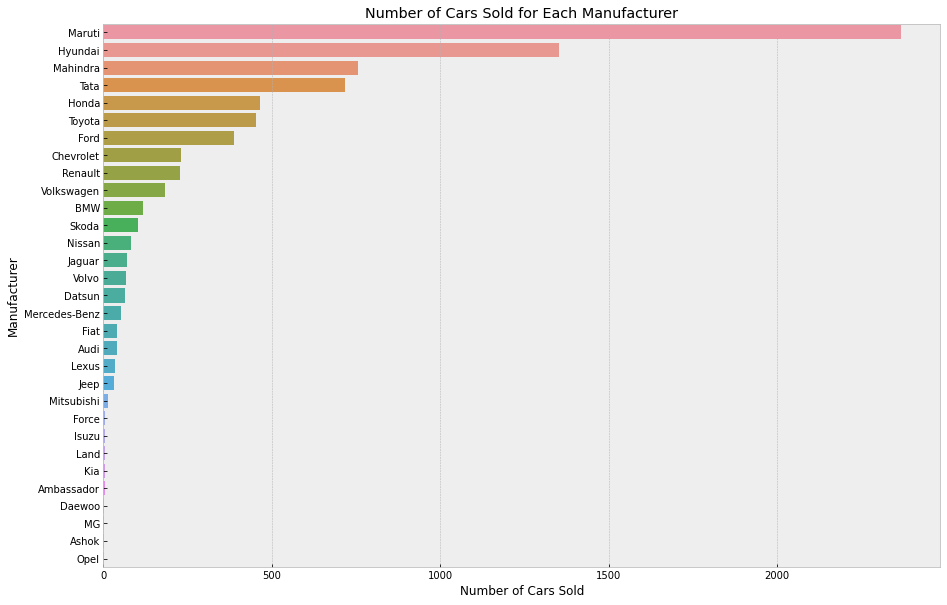

In [22]:
plt.figure(figsize=(15, 10))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index)
plt.title('Number of Cars Sold for Each Manufacturer')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Manufacturer')
plt.show()

# MODEL BUILDING

In the following section, models will be used to predict the selling price of used cars. The regression algorithms chosen are Linear Regression, Ridge Regression and Random Forest Regression as these will work best for this dataset.

#### Creating Model Dataframe

In [23]:
df_model = df.loc[:, 'age':'selling_price']
df_model.head()

,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


#### Creating Test and Training Set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_model.drop(columns='selling_price')
y = df_model['selling_price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6311, 10)
(1578, 10)
(6311,)
(1578,)


#### Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [28]:
# Standardizing year, km_driven, mileage, engine, max_power, seats
ss = StandardScaler()

# One-hot encoding fuel, seller_type, transmission
ohe = OneHotEncoder(sparse=False)

# Ordinal encoding owner
oe = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']])

In [29]:
ct = ColumnTransformer(
        [('ss', ss, [0, 1, 6, 7, 8, 9]),
         ('ohe', ohe, [2, 3, 4]),
         ('oe', oe, [5])])

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

#### Multivariate Linear Regression

Although it is expected that linear regression will not perform well, it is useful to provide a baseline to compare other algorithms' performance against.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

In [31]:
model_lr = LinearRegression()

In [32]:
cv = KFold(5, shuffle=True, random_state=42)
cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error').mean()

-281504.57795390626

In [33]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print(model_lr.intercept_)
print(model_lr.coef_)

917886.6392128819
[-125945.62027292  -55900.11602001   69423.08737485   62298.73622989
  462431.05091352  -27664.31109804  -28311.24692699  -70176.49873156
  177174.98809021  -78687.24243166  215512.80543118  -49597.73870574
 -165915.06672544  233987.65233378 -233987.65233378   -7554.32859469]


In [35]:
y_pred_lr = model_lr.predict(X_test)

# Mean Absolute Error
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
lr_mae

276469.4107709401

In [36]:
# Mean Squared Error
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr)
lr_mse

196983828803.30603

In [37]:
# Root Mean Squared Error
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
lr_rmse

443828.6029576125

In [38]:
# R2 Score
lr_r2 = model_lr.score(X_test, y_test)
lr_r2

0.6674475208517867

#### Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
# Tuning alpha
alpha = {}
alpha['alpha'] = np.arange(0, 100.1, 0.1)

gs_rr = GridSearchCV(Ridge(), alpha, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [41]:
gs_rr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])},
             scoring='neg_mean_absolute_error')

In [42]:
print(gs_rr.best_params_)
print(gs_rr.best_score_)

{'alpha': 100.0}
-277351.39121146733


In [43]:
model_rr = Ridge(alpha=gs_rr.best_params_['alpha'])

model_rr.fit(X_train, y_train)

Ridge(alpha=100.0)

In [44]:
y_pred_rr = model_rr.predict(X_test)

# Mean Absolute Error
rr_mae = metrics.mean_absolute_error(y_test, y_pred_rr)
rr_mae

272807.8328554737

In [45]:
# Mean Squared Error
rr_mse = metrics.mean_squared_error(y_test, y_pred_rr)
rr_mse

196126356473.41104

In [46]:
# Root Mean Squared Error
rr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr))
rr_rmse

442861.55452173884

In [47]:
# R2 Score
rr_r2 = model_rr.score(X_test, y_test)
rr_r2

0.6688951247025186

#### Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Hyperparameter tuning
rf_parameters = {}
rf_parameters['n_estimators'] = np.arange(100, 1010, 100)
rf_parameters['max_features'] = ('auto', 'sqrt', 'log2')

gs_rf = GridSearchCV(RandomForestRegressor(), rf_parameters, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [50]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='neg_mean_absolute_error')

In [51]:
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'max_features': 'auto', 'n_estimators': 800}
-69778.5175766017


In [52]:
model_rf = RandomForestRegressor(
    max_features=gs_rf.best_params_['max_features'],
    n_estimators=gs_rf.best_params_['n_estimators'])

model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=800)

In [53]:
y_pred_rf = model_rf.predict(X_test)

# Mean Absolute Error
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mae

93516.0005482195

In [54]:
# Mean Squared Error
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_mse

31114154153.196007

In [55]:
# Root Mean Squared Error
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_rmse

176392.04674019746

In [56]:
# R2 Score
rf_r2 = model_rf.score(X_test, y_test)
rf_r2

0.9474723932258577

#### Model Performance

In [57]:
df_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest Regression'],
    'MAE': [lr_mae, rr_mae, rf_mae],
    'MSE': [lr_mse, rr_mse, rf_mse],
    'RMSE': [lr_rmse, rr_rmse, rf_rmse],
    'R2': [lr_r2, rr_r2, rf_r2]}).round(3)
df_results

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,276469.411,1.969838e+11,443828.603,0.667
1,Ridge Regression,272807.833,1.961264e+11,442861.555,0.669
2,Random Forest Regression,93516.001,3.111415e+10,176392.047,0.947


Among the three models built, the results show that the Random Forest Regressor outperforms the linear regression and ridge regression models.

#### Saving the model

In [58]:
import joblib

In [59]:
joblib.dump(model_rf, 'model_rf.joblib')

['model_rf.joblib']